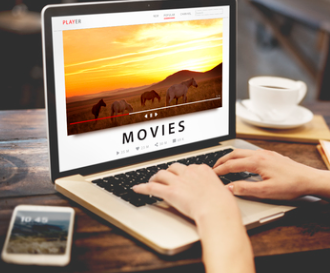


## Recommendation top 50 movies
MovieLens 25M Dataset
MovieLens 25M movie ratings.
This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service.

In [ ]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from zipfile import ZipFile

In [52]:
DataDir=os.path.join(os.path.dirname(os.path.realpath('__file__')),'RS')

In [53]:
DataFile= f"{DataDir}/ml-latest-small.zip"

#extract files

with ZipFile(DataFile,"r") as zip :
    print("extract file...")
    zip.extractall(path=DataDir)
    print("Done!")

extract file...
Done!


In [12]:
#read rating file
df=pd.read_csv(f"{DataDir}/ml-latest-small/ratings.csv")


In [10]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [18]:
print(f'The unique number of usersID: {df["userId"].nunique()}')

print(f'The unique number of moviesID: {df["movieId"].nunique()}')

The unique number of usersID: 610
The unique number of moviesID: 9724


In [20]:
#percentile of rating stats
print(f'rating stats:')
df['rating'].describe(percentiles=[.25,.5,.75,.95,.99,1])

rating stats:


count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
95%           5.000000
99%           5.000000
100%          5.000000
max           5.000000
Name: rating, dtype: float64

In [30]:
movies=pd.read_csv(f"{DataDir}/ml-latest-small//movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [43]:
popular = df.groupby(['movieId']).agg({
    'movieId':[('views','count')]
         })

# removing the top-level labels and leaves only the lower-level labels.
popular.columns = popular.columns.droplevel(level=0)
popular.head()

,views
movieId,
1,215
2,110
3,52
4,7
5,49


In [44]:
popular = popular[['views']]

popular.head()

,views
movieId,
1,215
2,110
3,52
4,7
5,49


In [47]:
popular.sort_values(by='views',ascending=False, inplace=True)
popular.head(10)

,views
movieId,
356,329
318,317
296,307
593,279
2571,278
260,251
480,238
110,237
589,224


In [48]:
print(f'The unique number of movies: {popular.shape[0]}')

The unique number of movies: 9724


In [49]:
popular['views'].describe(percentiles=[.25, .5, .75, .95, .99, .995, 1])

count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
95%        47.000000
99%       114.540000
99.5%     144.000000
100%      329.000000
max       329.000000
Name: views, dtype: float64

Text(0.5, 1.0, 'frequence distbution of movie views')

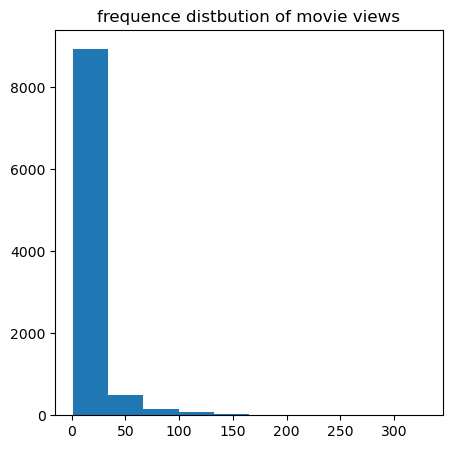

In [54]:
plt.figure(figsize=(5,5))
plt.hist(popular['views'])
plt.title('frequence distbution of movie views')

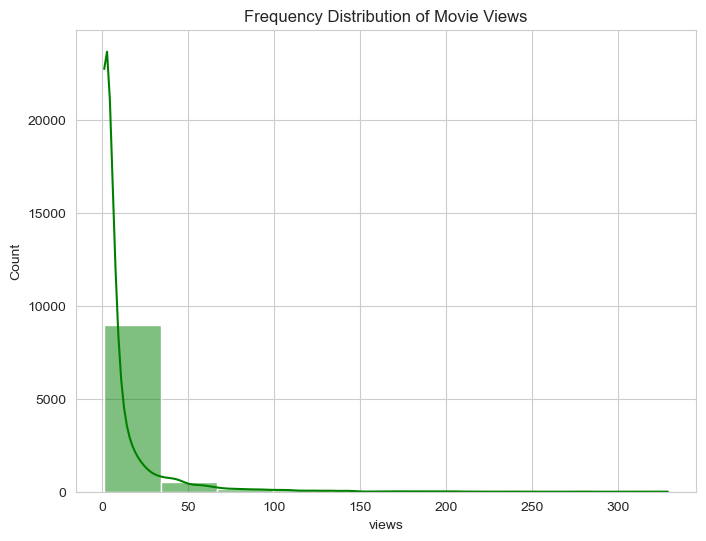

In [60]:
# Set a Seaborn style (optional)
sns.set_style("whitegrid")

# Create a figure and set the figure size
plt.figure(figsize=(8, 6))

# Use Seaborn's 'distplot' to create a colorful histogram
sns.histplot(popular['views'], bins=10, kde=True, color='green')

# Add a title to the plot
plt.title('Frequency Distribution of Movie Views')

# Show the plot
plt.show()

 ## Count the movies that are in the top 0.5% in terms of views

In [65]:
mask=popular['views'] >=np.percentile(popular['views'],q=99.5)
recommendations=popular[mask]
print(f'The unique number of movies: {recommendations.shape[0]}')

The unique number of movies: 50


In [69]:
recommendations=recommendations.merge(movies,how='left',on='movieId')

In [70]:
recommendations

,movieId,views,title,genres
0,356,329,Forrest Gump (1994),Comedy|Drama|Romance|War
1,318,317,"Shawshank Redemption, The (1994)",Crime|Drama
2,296,307,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,593,279,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
4,2571,278,"Matrix, The (1999)",Action|Sci-Fi|Thriller
5,260,251,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
6,480,238,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
7,110,237,Braveheart (1995),Action|Drama|War
8,589,224,Terminator 2: Judgment Day (1991),Action|Sci-Fi
9,527,220,Schindler's List (1993),Drama|War
